<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/%D0%94%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [4]:
df = df[['Size', 'Furnishing Status', 'City', 'Rent']]
df.head()

,Size,Furnishing Status,City,Rent
0,1100.0,Unfurnished,Kolkata,10000.0
1,800.0,Semi-Furnished,Kolkata,20000.0
2,1000.0,Semi-Furnished,Kolkata,17000.0
3,800.0,Unfurnished,Kolkata,10000.0
4,850.0,Unfurnished,Kolkata,7500.0


# Завдання 1
Очистіть дані від викидів, розділіть на тренувальну та тестову чатини. Цільова ознака `Rent`

In [5]:
df.describe()

,Size,Rent
count,4402.000000,4.369000e+03
mean,967.214675,3.461306e+04
std,636.118893,7.740818e+04
min,10.000000,1.200000e+03
25%,550.000000,1.000000e+04
50%,850.000000,1.600000e+04
75%,1200.000000,3.300000e+04
max,8000.000000,3.500000e+06


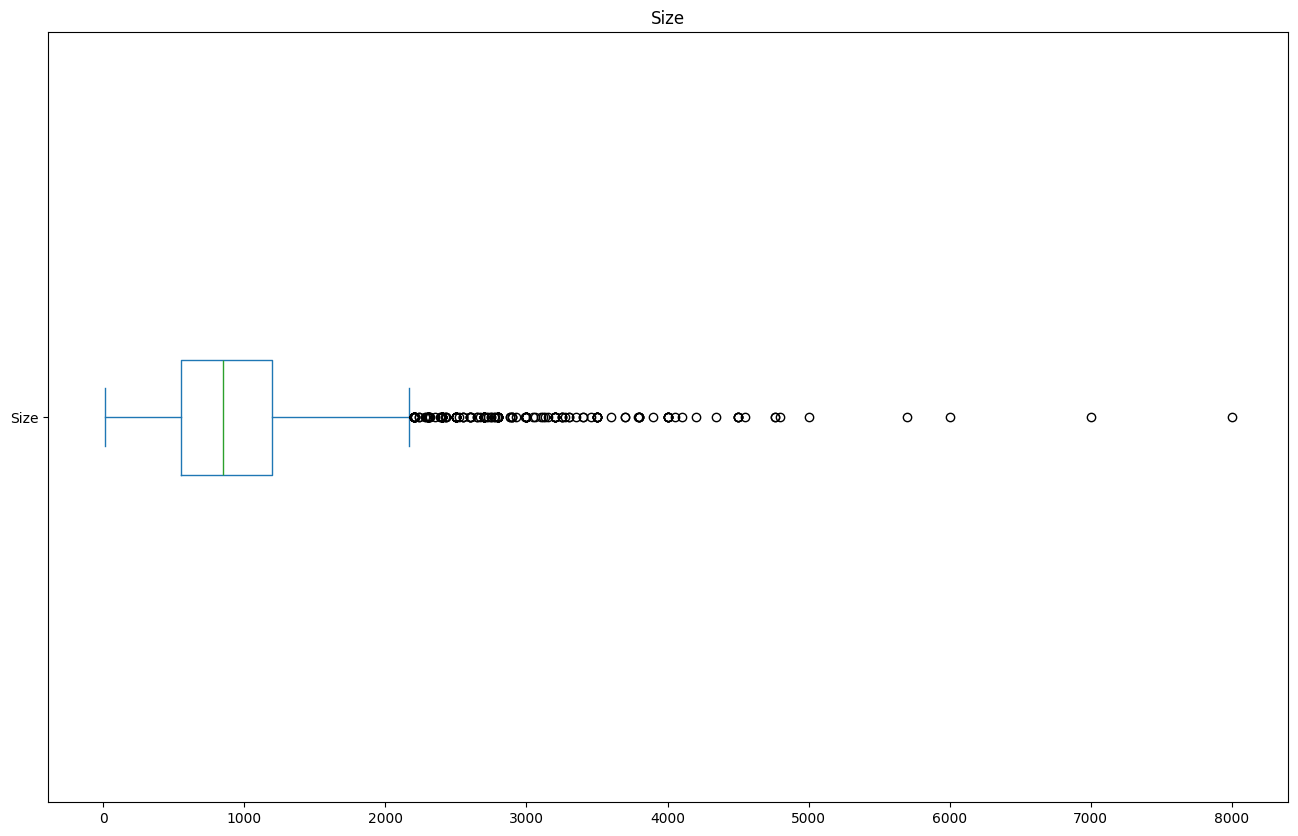

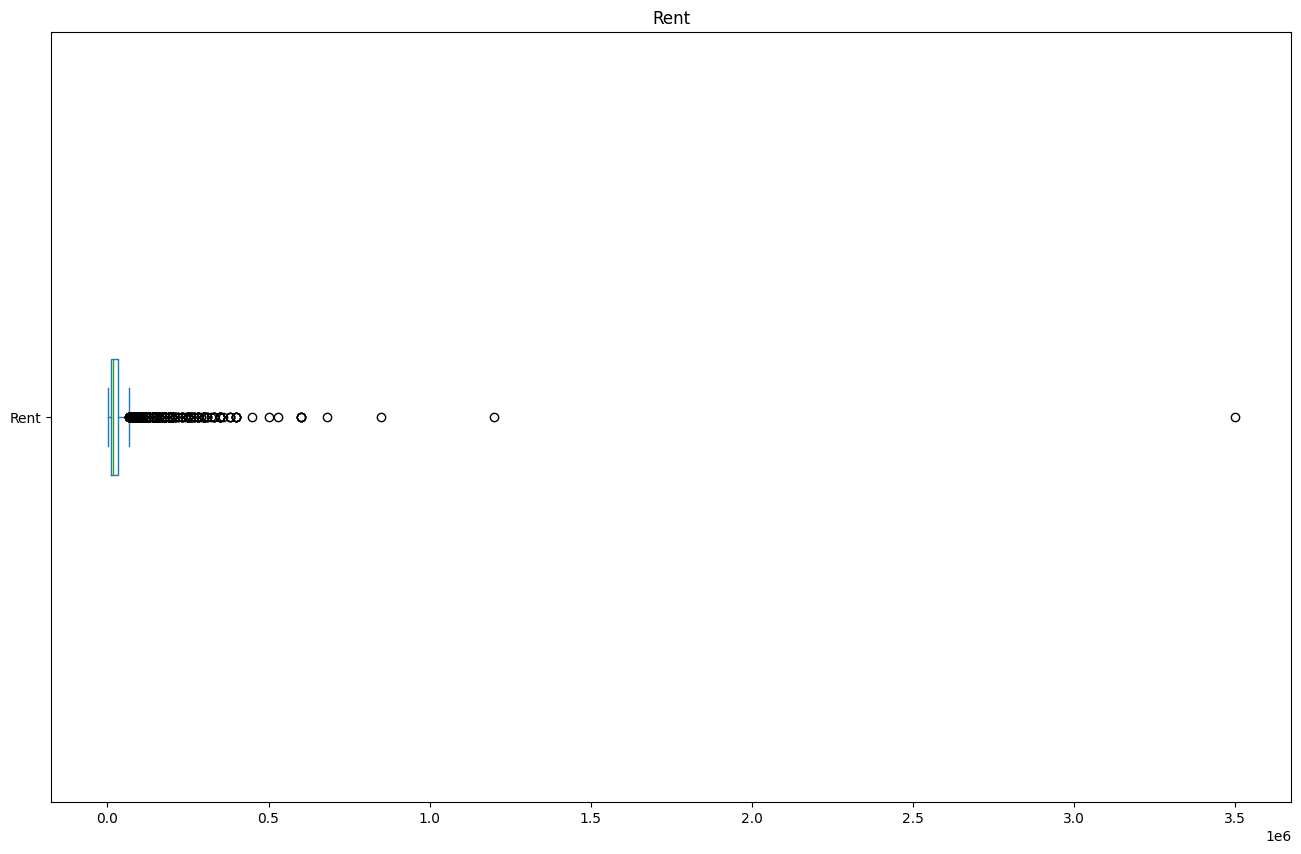

In [6]:
for col in df.select_dtypes(include="number").columns:
  df[col].plot(kind="box", vert=False, figsize=(16,10))
  plt.title(col)
  plt.show()

In [7]:
df_start = df
mask_rent = df['Rent']<1_000_000
num_emissions = (~mask_rent).sum()
num_rows = df_start.shape[0]
print(f"Number of emissions that are removed by value 'Rent': {num_emissions}. Percent: {(num_emissions/num_rows) *100:.2f}%.")
df=df[mask_rent]

mask_size = df['Size']<8000
num_emissions = (~mask_size).sum()
print(f"Number of emissions that are removed by value 'Size': {num_emissions}. Percent: {(num_emissions/num_rows) *100:.2f}%.")
#df=df[mask_size]

Number of emissions that are removed by value 'Rent': 379. Percent: 7.99%.
Number of emissions that are removed by value 'Size': 319. Percent: 6.72%.


Вирішила видаляти викиди тільки по змінній Rent, адже данні порядка 3,5 мільйони занадто далеко від останніх. А в змінній Size хоч і є викиди, проте не такі значні.

Викидів видалено досить багато, але це менше 10%, це допустима кількість.

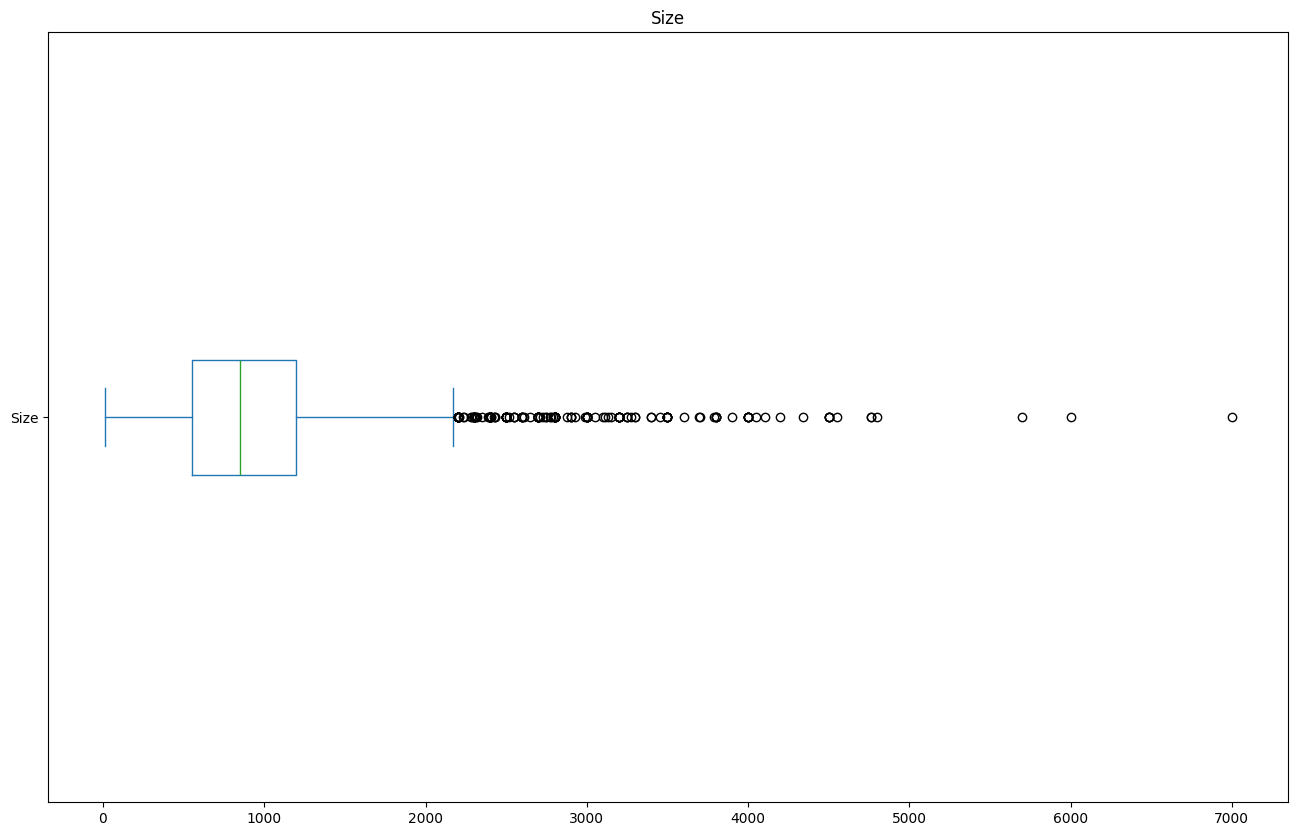

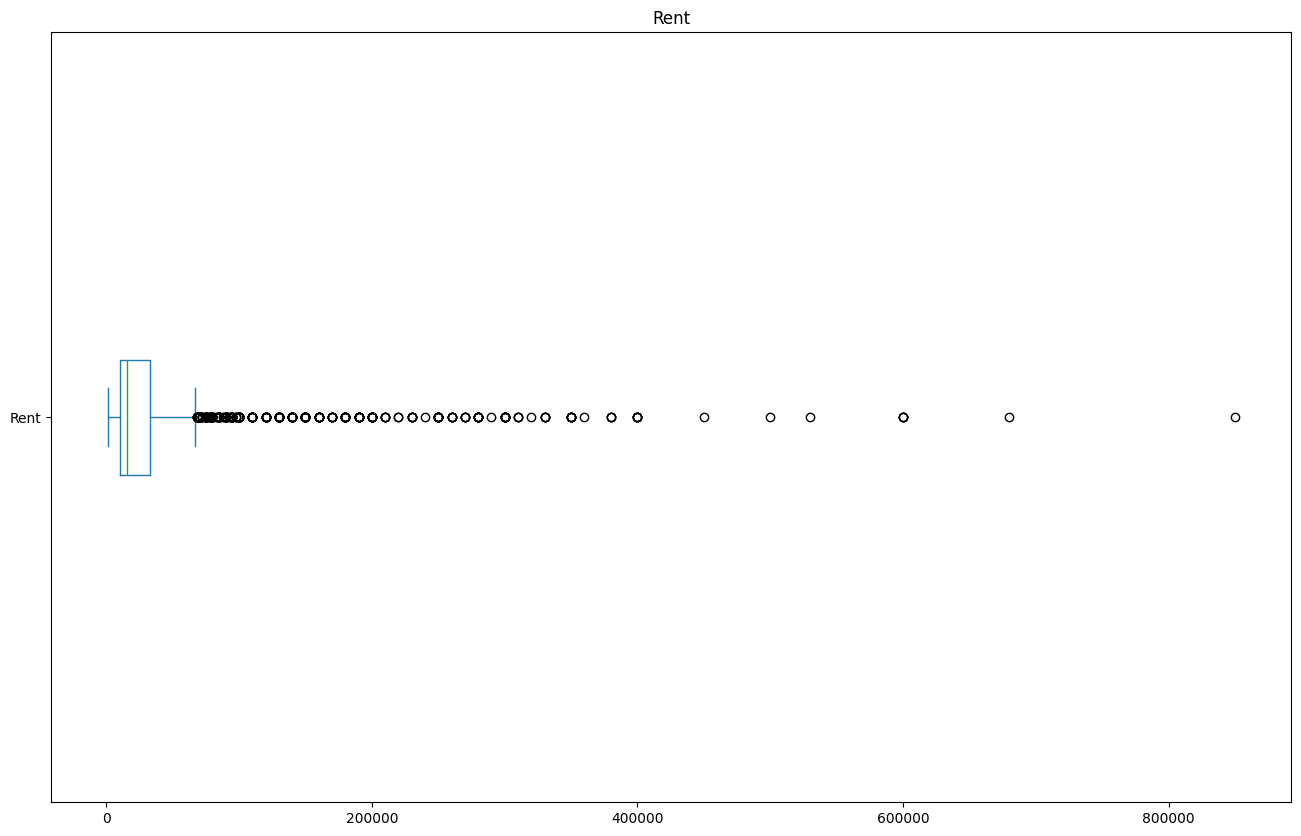

In [8]:
for col in df.select_dtypes(include="number").columns:
  df[col].plot(kind="box", vert=False, figsize=(16,10))
  plt.title(col)
  plt.show()

In [9]:
y = df['Rent']
X = df.drop(columns='Rent')
X.head()

,Size,Furnishing Status,City
0,1100.0,Unfurnished,Kolkata
1,800.0,Semi-Furnished,Kolkata
2,1000.0,Semi-Furnished,Kolkata
3,800.0,Unfurnished,Kolkata
4,850.0,Unfurnished,Kolkata


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y,
                                                     test_size=80,
                                                     random_state=42
                                                     )
X_train.head()

,Size,Furnishing Status,City
254,1000.0,Semi-Furnished,Kolkata
3449,800.0,Unfurnished,Chennai
2187,950.0,Unfurnished,Bangalore
4435,800.0,NaN,Hyderabad
186,600.0,NaN,Kolkata


# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [11]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [12]:

num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

In [13]:
cat_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)
cat_transformer


Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [15]:
num_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='mean'))
    ]
)
num_transformer

Pipeline(steps=[('impute', SimpleImputer())])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [16]:
preprocessor = ColumnTransformer(
    [
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['Size'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Furnishing Status', 'City'], dtype='object'))])

# Завдання 5
Створіть остаточну модель та натренуйте її

In [17]:

from sklearn.linear_model import LinearRegression


full_model = Pipeline(
    [
        ('prep', preprocessor),
        ('linear_regression', LinearRegression())
    ]
)

full_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

In [19]:

full_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [20]:
from sklearn import metrics


y_train_pred = full_model.predict(X_train)

metrics.r2_score(y_train_pred, y_train)

-0.31891945782472386

# Завдання 7
Спрогнозуйте ціну будинку

In [21]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai']})

data

,Size,Furnishing Status,City
0,900,Semi-Furnished,Mumbai


In [22]:
full_model.predict(data)

array([66670.30525073])